# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [7]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [9]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [14]:
# Extract all rows of data
weather_table = soup.find('tbody')
weather_rows = weather_table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
for row in weather_rows:
	# Create an empty dictionary for row data
	data = []
	#Secondary loop for table data
	for td in row.find_all('td'):
		data.append(td.text)
	# Append the dictionary to the list
	weather_data.append(data)

#Show the beginning of the list
print(weather_data[:5])

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]


In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = [th.text for th in weather_table.find_all('th')]

weather_df = pd.DataFrame(weather_data, columns=columns)

In [20]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
print(weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [23]:
# Change data types for data analysis
# Remove leading or trailing whitespace (if any)
weather_data_df = weather_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert columns to the specified data types
weather_data_df['id'] = pd.to_numeric(weather_df['id'], errors='coerce')  # Convert to integer
weather_data_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'], errors='coerce')  # Convert to datetime
weather_data_df['sol'] = pd.to_numeric(weather_df['sol'], errors='coerce')  # Convert to float
weather_data_df['ls'] = pd.to_numeric(weather_df['ls'], errors='coerce')  # Convert to float
weather_data_df['month'] = weather_df['month'].astype(str)  # Ensure month is a string
weather_data_df['min_temp'] = pd.to_numeric(weather_df['min_temp'], errors='coerce')  # Convert to float
weather_data_df['pressure'] = pd.to_numeric(weather_df['pressure'], errors='coerce')  # Convert to float


C:\Users\Dell\AppData\Local\Temp\ipykernel_37076\2119814426.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weather_data_df = weather_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [24]:
# Confirm type changes were successful by examining data types again
print(weather_data_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [38]:
# 1. How many months are there on Mars?
months = weather_data_df['month'].nunique()
months

12

In [39]:
# 2. How many sols (Martian days) worth of data are there?
sols = weather_data_df['sol'].nunique()
sols

1867

In [43]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = weather_data_df.groupby('month')['min_temp'].mean()

average_min_temp_by_month

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

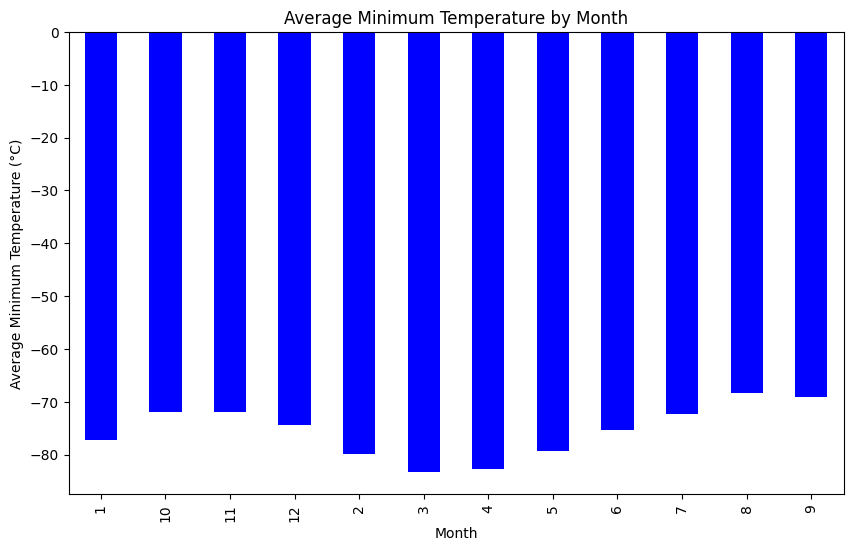

In [54]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10,6))
average_min_temp_by_month.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


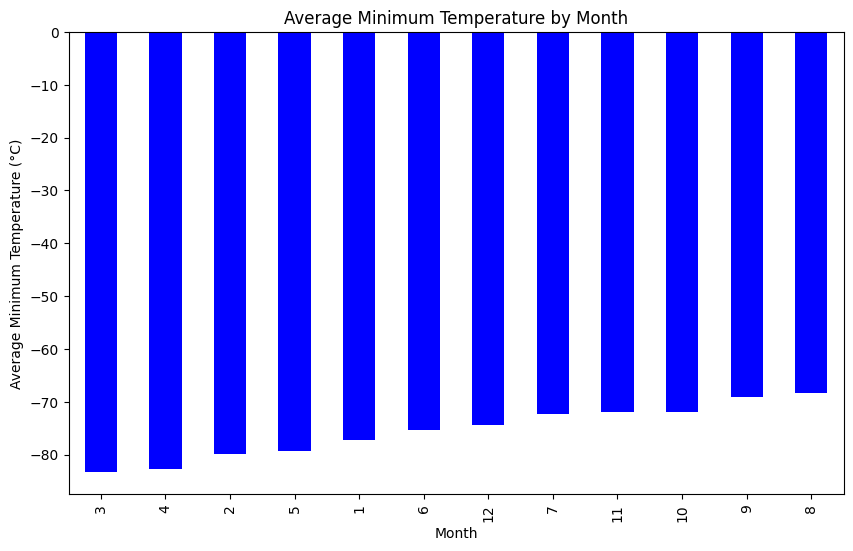

In [59]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temps = average_min_temp_by_month.sort_values()


plt.figure(figsize=(10,6))
sorted_temps.plot(kind='bar', color='blue')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=90)
plt.show()


In [61]:
# 4. What is the average pressure by month?
average_pressure = weather_data_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

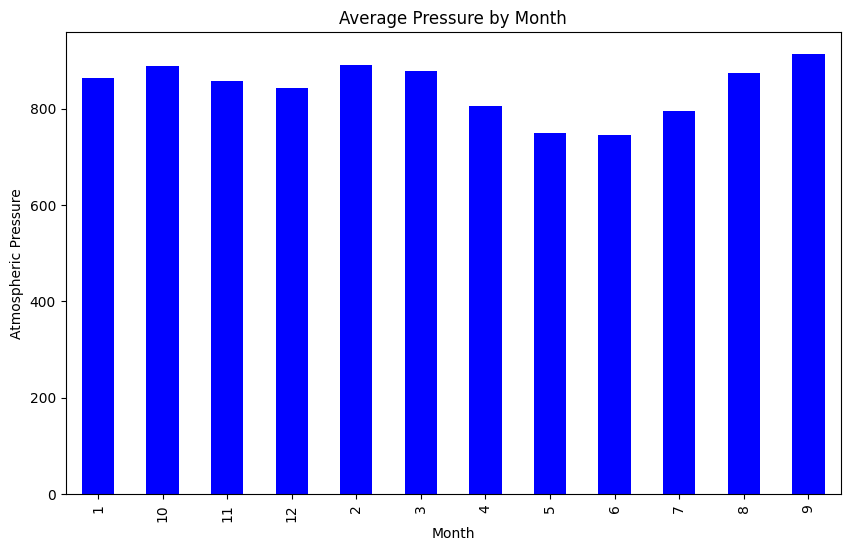

In [62]:
# Plot the average pressure by month
plt.figure(figsize=(10,6))
average_pressure.plot(kind='bar', color='blue')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)
plt.show()

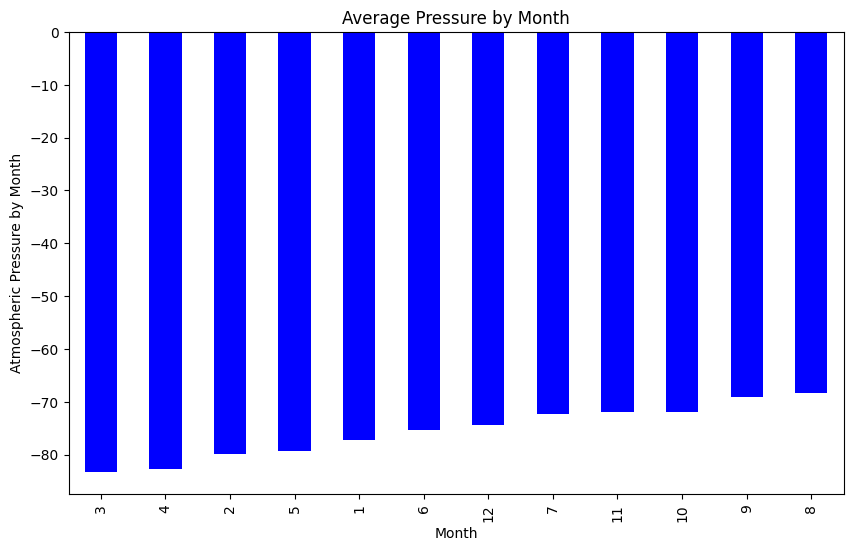

In [63]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = average_pressure.sort_values()


plt.figure(figsize=(10,6))
sorted_temps.plot(kind='bar', color='blue')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure by Month')
plt.xticks(rotation=90)
plt.show()

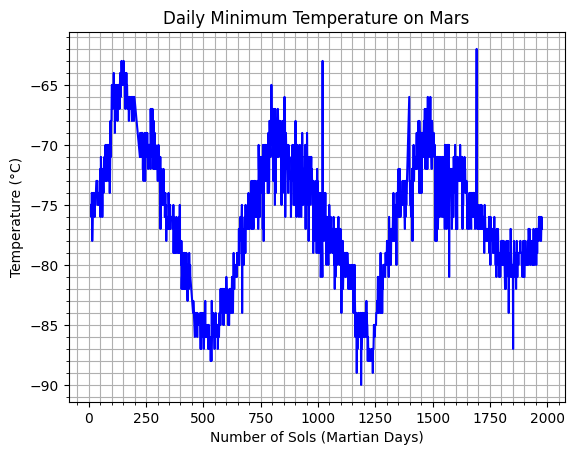

In [66]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
weather_data_df.plot(x='sol', y='min_temp', color='blue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Sols (Martian Days)')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=0)
plt.minorticks_on()
plt.grid(which='both')
plt.legend().remove()
plt.show()


#### Minimum Temperature

The warmest months in mars are in the middle of their martian year which is similar to terrestrial temperature trends although the temperatures are drastically colder since Mars is further from the Sun than Earth is.

#### Atmospheric Pressure

The beginning six months of a martian year tend to have less pressure than the latter six months of the martian year.

#### Year Length

it looks like the yearly trends on Mars are consistent in rising and falling with the seasaons with a couple of outliers. This could be due to solar flares and other factors of the atmosphere on mars.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [65]:
# Write the data to a CSV
weather_data_df.to_csv('part_2_mars_weather.ipynb', index=False)

In [67]:
browser.quit()